In [1]:
#libraries
import numpy as np 
import pandas as pd
import math
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Part C

neural network using sklearn

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)

    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)

    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted

    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)
    import math


    def lookin(self,data):
        listx=[]
        listy=[]
        for index, row in data.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)):
            if i< len(self.clf.coefs_)-1:
                print("hidden layer ", i+1)
            else:
                print("output")
            datac=data.copy()
            l=(self.lookinlayer(datac,l,self.clf.coefs_[i],self.clf.intercepts_[i]))


    def lookinlayer(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            print("neuron ", k+1)
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction = bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
            plotting_test(data)    
        return rlist  
    
    # same as lookinlayer but without the plotting
    def lookinlayer1(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1  
        return rlist

    def getLastHiddenLayerInfo(self,data):
            listx=[]
            listy=[]
            val=[]        

#             for index, row in self.train.iterrows():
            for index, row in data.iterrows():
                listx.append(row["x"])
                listy.append(row["y"])
                val.append(row["value"])
            l=[listx,listy]
            for i in range(len(self.clf.coefs_)-1):
                data=self.train.copy()
                l=(self.lookinlayer1(data,l,self.clf.coefs_[i],self.clf.intercepts_[i]))
            l.append(val)
            return l


In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

def plotting_train1(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.xlim([-3, 3])  
    plt.ylim([-3, 3])
    plt.show()

def plotting_train2(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
   

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Part C main

plotting train


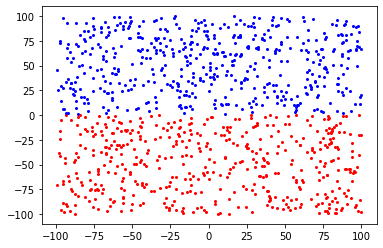

first test
0.998
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       510
           1       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



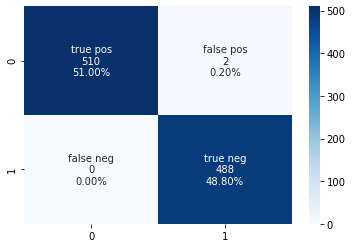

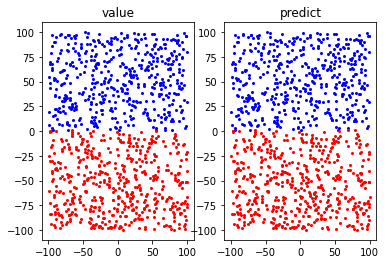

second test
1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



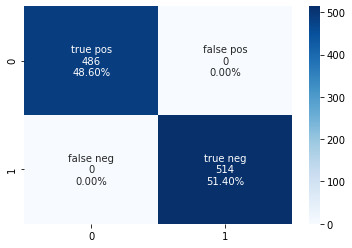

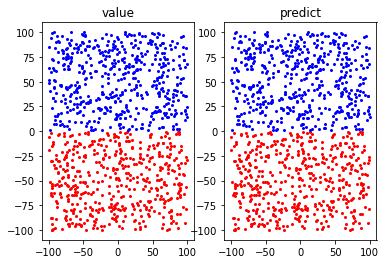

In [7]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,4))
net1.fit()
print("plotting train")
plotting_train2(train)
# net1.lookin(train)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
print(classification_report(test_y, pred1))
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
print(classification_report(test_y, pred2))
plotting_test(second_test)

hidden layer  1
neuron  1


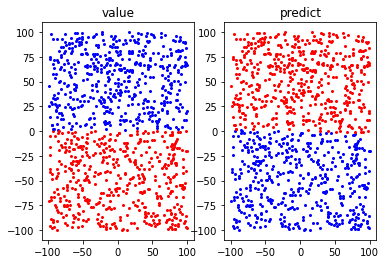

neuron  2


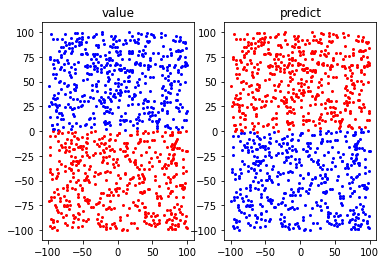

neuron  3


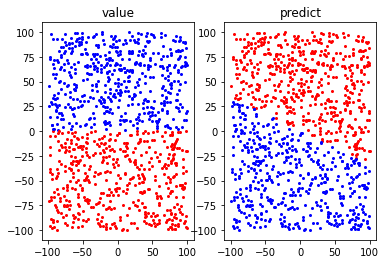

neuron  4


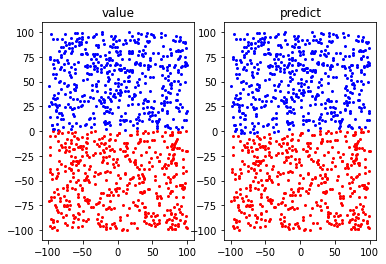

hidden layer  2
neuron  1


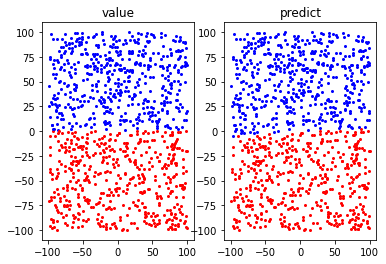

neuron  2


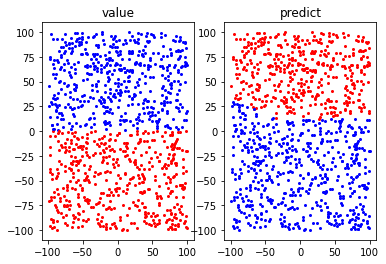

neuron  3


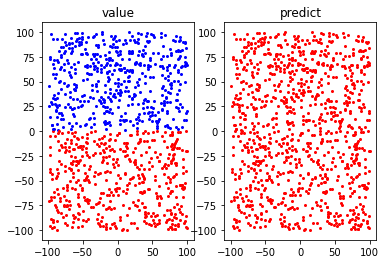

neuron  4


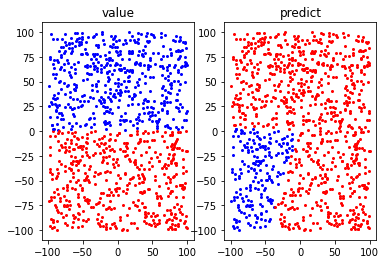

output
neuron  1


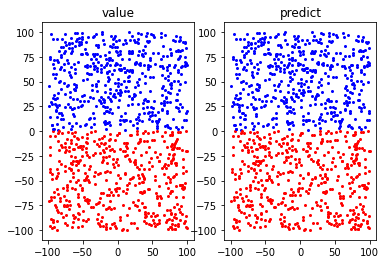

In [8]:
net1.lookin(train)

In [9]:
# net1.lookin(first_test)

In [10]:
# net1.lookin(second_test)

part b:

In [11]:
# using relu
# (5,2) ~0.935
# (5,10,10,5) ~ 0.985
# (5,10,10,10,5) ~0.975
# (10,20,10,5) ~0.975
# (10,5) ~0.98

# using sigmoid
# (5,2) ~0.935
# (10,5) ~0.98

plotting train


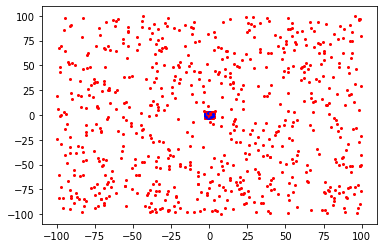

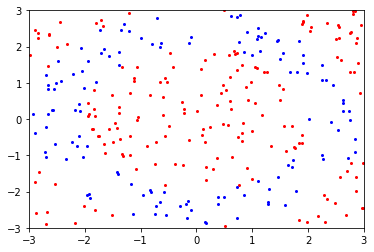

first test
0.983
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       870
           1       0.95      0.92      0.93       130

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



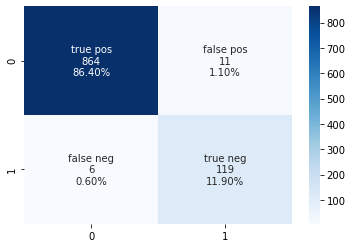

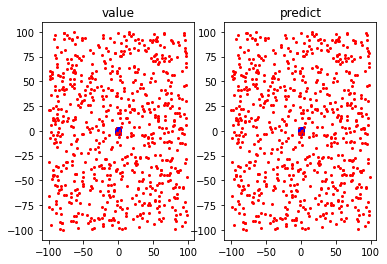

second test
0.987
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       867
           1       0.95      0.95      0.95       133

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000



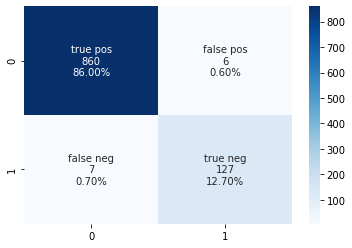

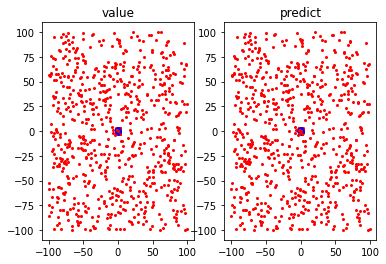

In [12]:
trainb = build_data_partB(9)
net2=NeuralNetwork(0.01,trainb,(5,10,10,5))
net2.fit()
print("plotting train")
plotting_train1(trainb)
# net2.lookin(trainb)

print("first test")
first_testb = build_data_partB(3)
test_yb=first_testb[["value"]]
pred1=net2.predict(first_testb)
print(net2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB(7)
test_yb=second_testb[["value"]]
pred2=net2.predict(second_testb)
print(net2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

hidden layer  1
neuron  1


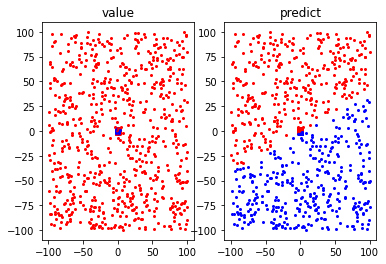

neuron  2


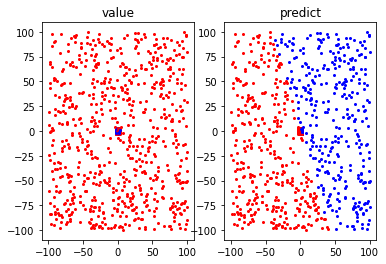

neuron  3


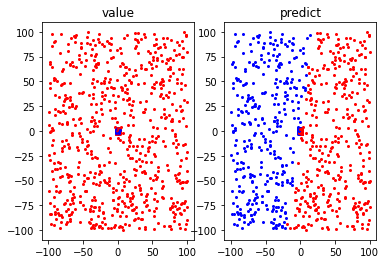

neuron  4


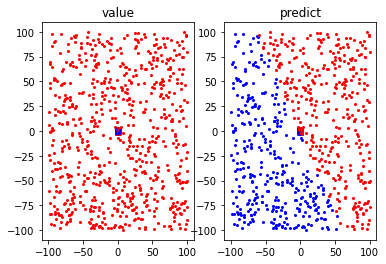

neuron  5


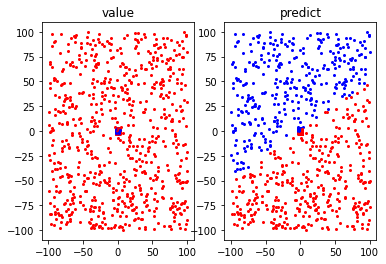

hidden layer  2
neuron  1


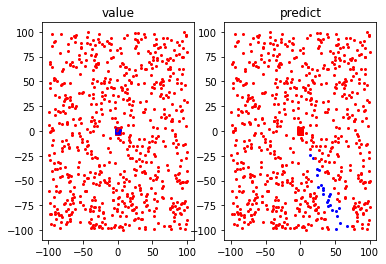

neuron  2


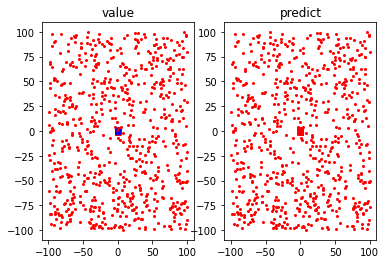

neuron  3


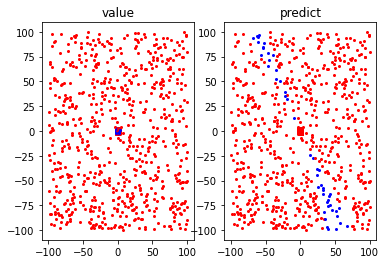

neuron  4


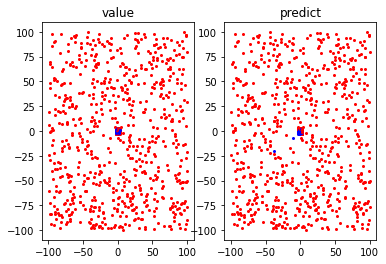

neuron  5


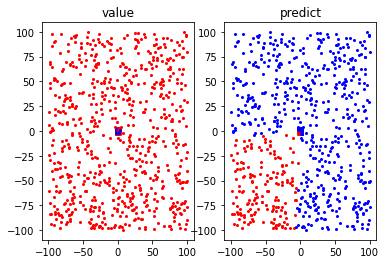

neuron  6


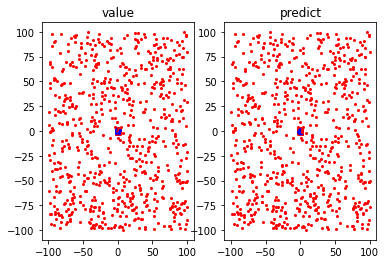

neuron  7


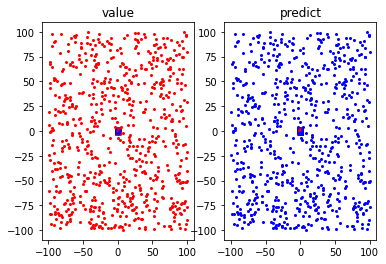

neuron  8


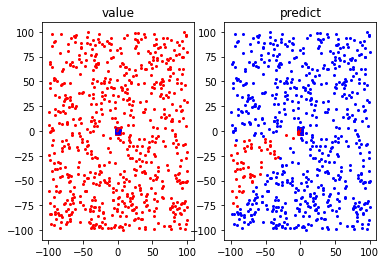

neuron  9


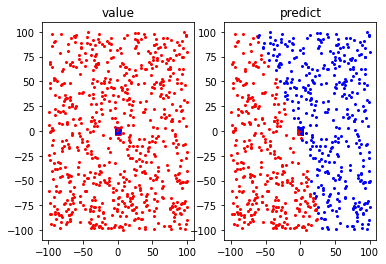

neuron  10


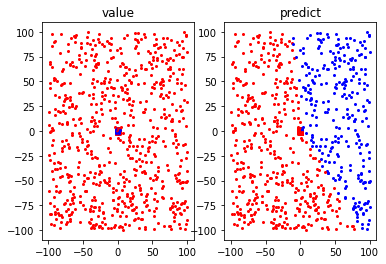

hidden layer  3
neuron  1


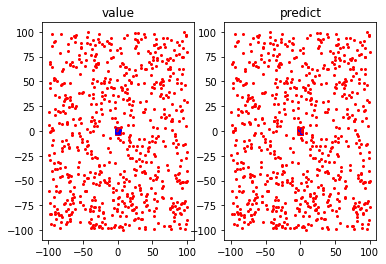

neuron  2


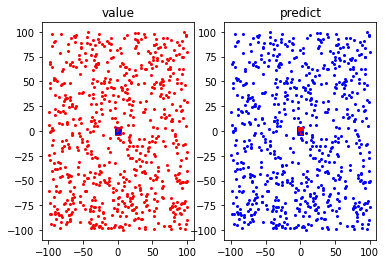

neuron  3


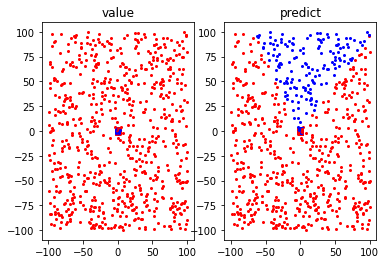

neuron  4


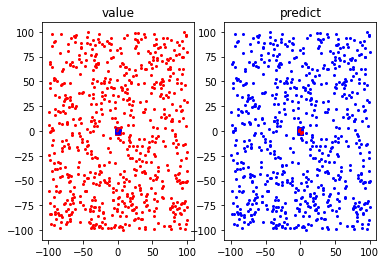

neuron  5


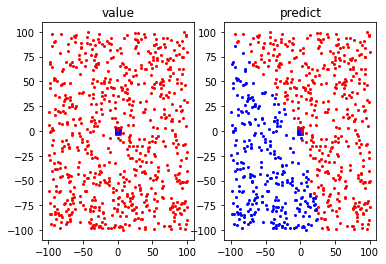

neuron  6


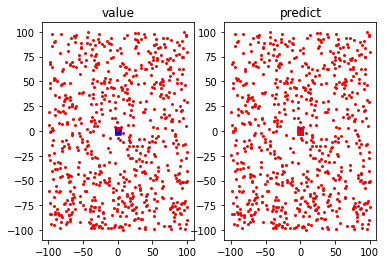

neuron  7


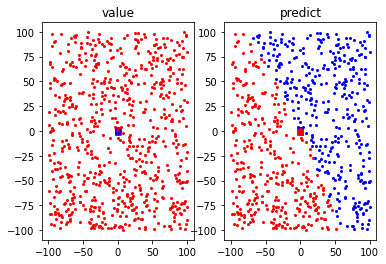

neuron  8


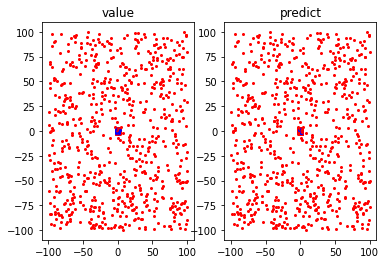

neuron  9


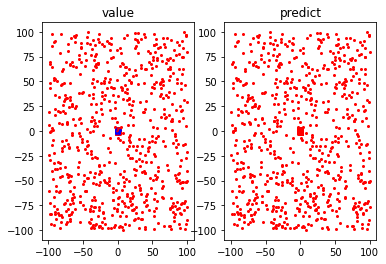

neuron  10


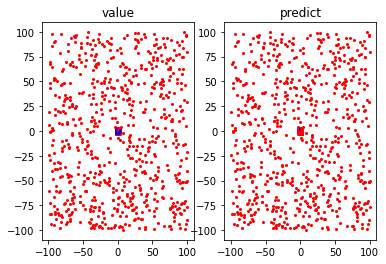

hidden layer  4
neuron  1


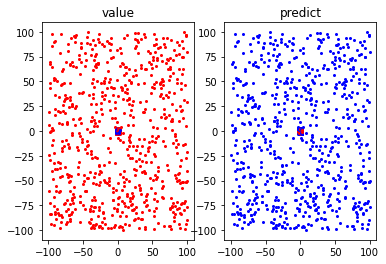

neuron  2


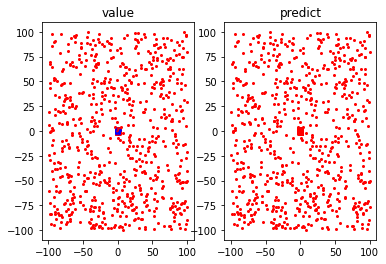

neuron  3


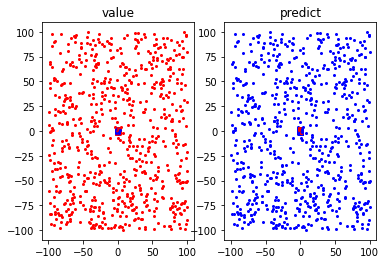

neuron  4


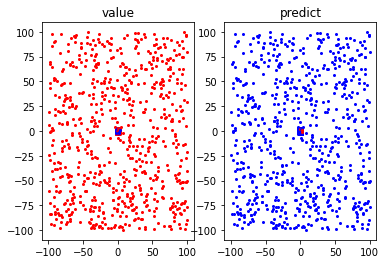

neuron  5


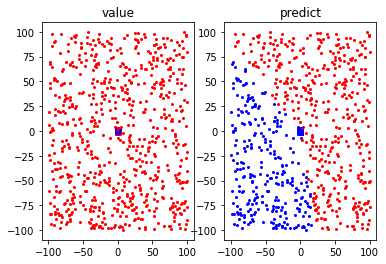

output
neuron  1


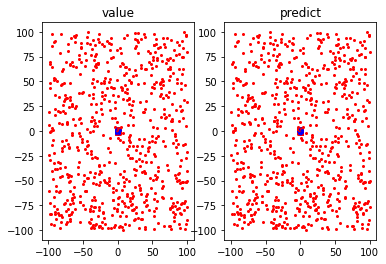

In [13]:
net2.lookin(trainb)

In [14]:
# net2.lookin(first_testb)

In [15]:
# net2.lookin(second_testb)

# part D

In [16]:
class Adaline:
    def __init__(self, learning_rate, train, num,epoch,change_lr):
        self.learning_rate = learning_rate
        self.train = train
        self.num=num # number of neurons in last layer
        self.epoch=epoch
        self.change_lr=change_lr

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self,num):
        weight = [] 
        for i in range(num):
            random.seed(i)
            rand = random.uniform(-1.0, 1.0)
            rand = round(rand, 4)
            weight.append(rand)
        print("start weights = \n", weight)
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        ERR = []
        mse = []
        EPS = 0.0001
        # generate weights and bias
        weight, bias = self._weight_genarate(self.num)
        oldmse=1
        count=0
        while(count<self.epoch):
            if(count==self.change_lr):
                self.learning_rate=self.learning_rate/2
                self.change_lr+=self.change_lr
            ERR = []
            # for each row we fix the bias and wights in order to get the minimum error
            for index, row in self.train.iterrows():
                predicted=bias/100
                for i in range(self.num):
                    predicted += row[i]/1000 * weight[i]
                for k in range(len(weight)):
                    weight[k] = round((weight[k] + self.learning_rate * (row["value"]-predicted) * row[k]/1000),3)
                bias= round((bias + self.learning_rate * (row["value"]-predicted)),3)
                # error calculation
                error = (row["value"] - predicted) ** 2
                # if the error is small enough return
                ERR.append(error)
            mse.append(np.sum(ERR))
            print(mse[-1])
            if len(mse) >= 2:
                # checking if the error is smaller then eps or if it hasnt changed
                if abs(mse[-1] - mse[-2]) < EPS  or abs(mse[-1] - mse[-2])==oldmse :
                    break
            # updating the old mse
            if len(mse)>=2:
                oldmse=abs(mse[-1] - mse[-2])
            count+=1
        print(count)
        return weight, bias

    

    
    
#     # this function predicts on a test data and returns the number of correct predictions
    def predict(self, dftest, test, weight, bias):
        count = 0
        pred = []
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for index, row in dftest.iterrows():
            predicted=bias/100
            for i in range(self.num):
                predicted += row[i]/1000 * weight[i]
#             print(predicted)
            if predicted > 0:
                predicted = 1
            else:
                predicted = -1
            pred.append(predicted)

            if predicted == row['value']:
                count += 1
        # now add the prediction list to the data set in order to make comparison 
        test['pred'] = pred
        return count

    # this function caculates the acuuracy of the predictions
    def score(self, pred, dftest):
        acurr = pred / len(dftest)
        res = round(acurr, 4)
        return res

plotting train


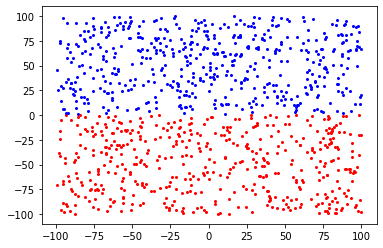

net last layer weight=
 [[ 2.12396395]
 [-1.45058846]
 [ 0.39187076]
 [-0.37723594]]
start weights = 
 [0.6888, -0.7313, 0.9121, -0.5241]
260.6536126160303
251.66526303165284
251.408659146648
251.20148228326664
250.99957118361198
250.8003664449892
250.6097028300845
250.41941455039463
250.23000248019437
250.0439802856692
249.85605807135553
249.6730261415323
249.4904925035829
249.31182547023477
249.13735454875152
248.96547392988776
248.7980363331324
248.62746999995
248.4540307242109
248.28618822709768
248.12422106363624
247.95884764123835
247.79622220290844
247.63275000708285
247.47439649454685
247.32098116337892
247.16638756470962
247.01152655455627
246.86212497758748
246.71113209440944
246.55782967749067
246.41560765242755
246.2698855546916
246.13307783205727
245.99155017524413
245.8520420992583
245.71286669125618
245.5769700817564
245.43897857556607
245.30580757989213
245.17526379685347
245.0432614752363
244.91197178235035
244.78140530594084
244.65513850621932
244.53174467700137
244.4

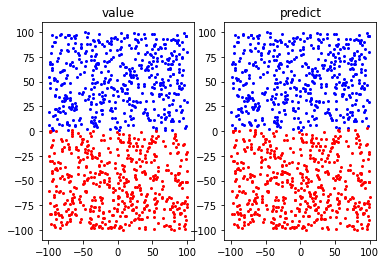

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       510
           1       1.00      0.99      0.99       490

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



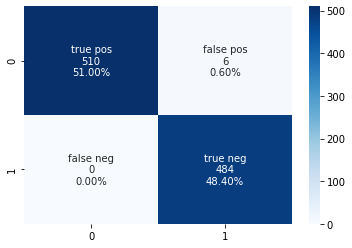

In [17]:
# create train df
traina=build_data_partA(1)
listA=net1.getLastHiddenLayerInfo(traina)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train2(traina)
        
        
# create test df
test = build_data_partA(9)
newtest = net1.getLastHiddenLayerInfo(test)
dftest = pd.DataFrame()
for i in range(len(newtest)):
    if(i<len(newtest)-1):
        dftest[i]=newtest[i]
    else:
        dftest["value"]=newtest[i]
print("net last layer weight=\n",net1.clf.coefs_[-1])
ada1 = Adaline(0.9, dftrain, len(listA)-1, epoch=50,change_lr=-1)
weight, bias = ada1.fit()
print("ada weight =\n",weight)
count=ada1.predict(dftest, test, weight, bias)
print(ada1.score(count, dftest))
plotting_test(test)
con_mat1 = confusion_matrix(test["pred"],test["value"])
confussion_matrix(con_mat1)
print(classification_report(test["value"],test["pred"]))

plotting train


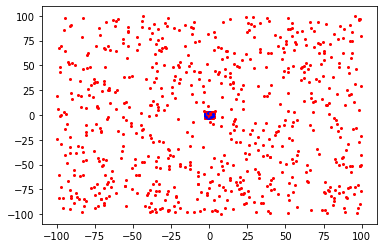

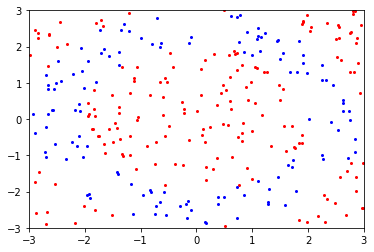

net last layer weight=
 [[-2.08481307]
 [ 0.75202778]
 [-1.25638042]
 [-4.60876168]
 [ 2.85063458]]
start weights = 
 [0.6888, -0.7313, 0.9121, -0.5241, -0.5279]
395.22964707223866
364.1697608876609
354.1122129371542
349.9266510971038
348.0409886225559
346.97295218166016
346.41769842799596
346.0458301287233
345.79767677985427
345.63142983648
345.4907437062575
345.4047017626901
345.36672042936056
345.302843626028
345.2949991765567
345.3004356614388
345.269838342228
345.28938002052746
345.3206315917622
345.32736111339415
345.3868639453075
345.3907114507257
345.4253318420195
345.44393082590125
345.467644173116
345.4865784883383
345.528045258574
345.59114314183415
345.5806017451625
345.6174901736935
345.6546612668418
345.6725297003619
345.7098912928015
345.7324425183475
345.7592218486714
345.78006430372943
345.81502080223703
345.8374153188392
345.87188125388775
345.905412985428
345.8992207310439
345.9649245892337
345.94822790481896
345.9573157807144
345.9799196526705
346.00130367517664
346

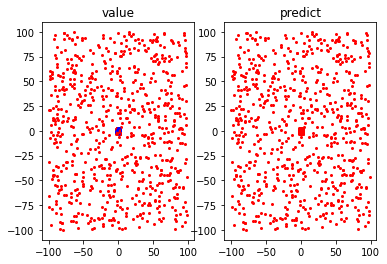

              precision    recall  f1-score   support

          -1       0.87      1.00      0.93       870
           1       0.00      0.00      0.00       130

    accuracy                           0.87      1000
   macro avg       0.43      0.50      0.47      1000
weighted avg       0.76      0.87      0.81      1000



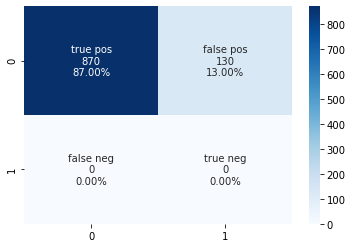

In [18]:
trainb=build_data_partB(9)
listA=net2.getLastHiddenLayerInfo(trainb)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train1(trainb)

testb=build_data_partB(3)
listB=net2.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",net2.clf.coefs_[-1])        
# adab=Adaline(0.752, dftrain, len(listA)-1,epoch=90,change_lr=22)
adab=Adaline(0.2, dftrain, len(listA)-1,epoch=250,change_lr=70)
weight,bias =adab.fit()
print("ada weight =\n",weight)
count=adab.predict(dftest,testb,weight, bias)
print(adab.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))

In [19]:
# (5,10,10,5)
# lr=0.75
# 50 epoch every 20 divide by 2 lr

#0.837

In [20]:
# (5,10,10,5)
# lr=0.752
# 50 epoch every 22 divide by 2 lr

#0.837

In [21]:
# (5,10,10,5)
# lr=0.745
# 50 epoch every 22 divide by 2 lr
# 0.836

In [22]:
# (5,10,10,5)
# lr=0.745
# 70 epoch every 22 divide by 2 lr
# 0.841

In [23]:
# (5,10,10,5)
# lr=0.745
# 90 epoch every 22 divide by 2 lr

# 0.845

In [24]:
# (5,10,10,5)
# lr=0.745
# 132 epoch every 22 divide by 2 lr

# 0.842

### doing all the prosses for the data w/o adding extra to the middle

In [25]:
def build_data_partB1(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


plotting train


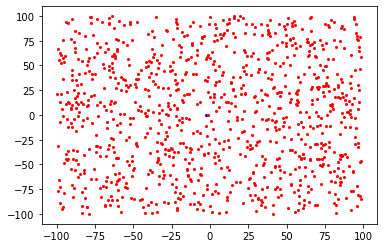

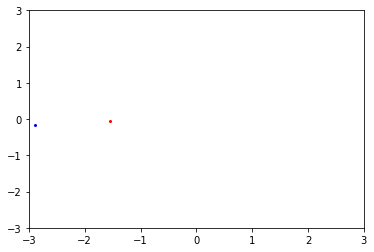

first test
0.999
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1000
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



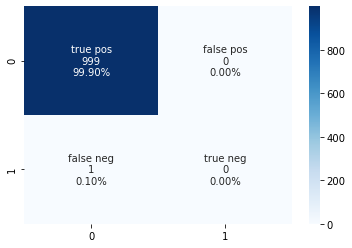

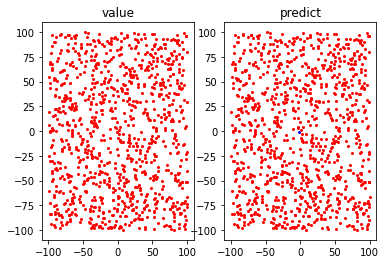

second test
0.999
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



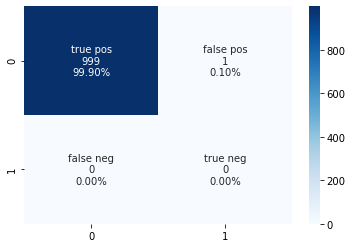

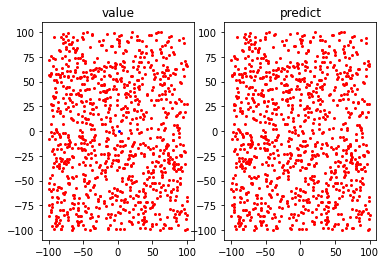

In [26]:
# switched train to data that had a dot in the area


trainb = build_data_partB1(3)
netb1=NeuralNetwork(0.01,trainb,(5,10,10,5))
netb1.fit()
print("plotting train")
plotting_train1(trainb)


print("first test")
first_testb = build_data_partB1(9)
test_yb=first_testb[["value"]]
pred1=netb1.predict(first_testb)
print(netb1.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB1(7)
test_yb=second_testb[["value"]]
pred2=netb1.predict(second_testb)
print(netb1.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

plotting train


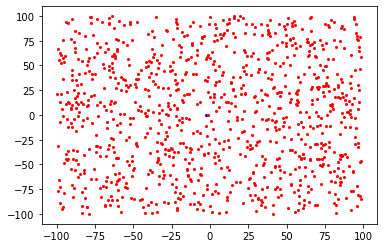

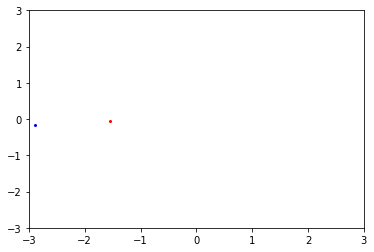

net last layer weight=
 [[-1.2061145 ]
 [ 0.67036337]
 [ 0.47998985]
 [-1.24760651]
 [ 0.42120599]]
start weights = 
 [0.6888, -0.7313, 0.9121, -0.5241, -0.5279]
58.09601243675755
5.0282813857984445
4.460174882036377
4.357749744923826
4.2804604105203055
4.21862153673735
4.1715167026786855
4.132700154679803
4.100372976839055
4.074255233978521
4.055031913843547
4.0396658399361005
4.029328151676542
4.021499112100356
4.017080111227327
4.013447877639424
4.011815222816966
4.0112353797999125
4.011017683020215
4.010844588975234
4.003380613520565
4.000041399760235
4.001489889306058
4.003885090441815
4.005893449785627
4.00855323405779
4.010943116242711
4.013150956223912
4.014723287546804
4.016215763930906
4.017695568978781
4.018651928696125
4.019661335038727
4.020547707647191
4.020774483085913
4.0207314632881435
35
ada weight =
 [0.133, -0.31, 0.734, -0.667, -0.528]
0.999


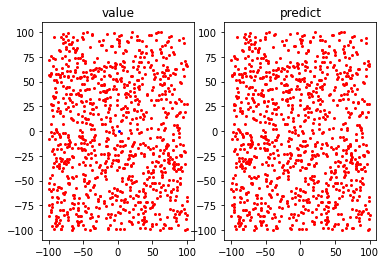

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



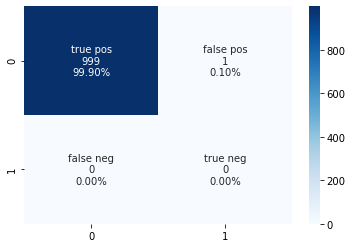

In [27]:
trainb=build_data_partB1(3)
listA=netb1.getLastHiddenLayerInfo(trainb)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print("plotting train")
plotting_train1(trainb)

testb=build_data_partB1(7)
listB=netb1.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",netb1.clf.coefs_[-1])        
ada_b1=Adaline(0.9, dftrain, len(listA)-1,epoch=100,change_lr=20)
weight,bias =ada_b1.fit()
print("ada weight =\n",weight)
count=ada_b1.predict(dftest,testb,weight, bias)
print(ada_b1.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))

In [28]:
### doing all the process for the data with big circle

In [29]:
def build_data_partB2(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(970):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
#         if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
        if 25<=(y[i]**2+x[i]**2)<=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(970,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-500, 500)
        randY = random.randint(-500, 500)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
#         if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
        if 25<=(y[i]**2+x[i]**2)<=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


plotting train


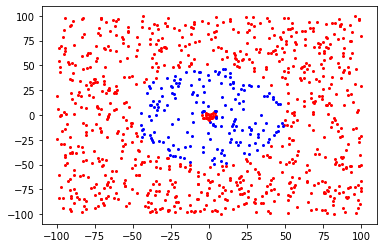

first test
0.981
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       803
           1       0.94      0.96      0.95       197

    accuracy                           0.98      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



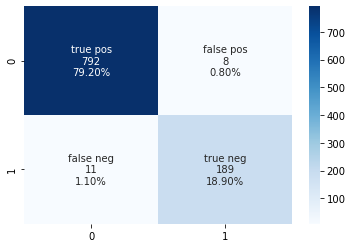

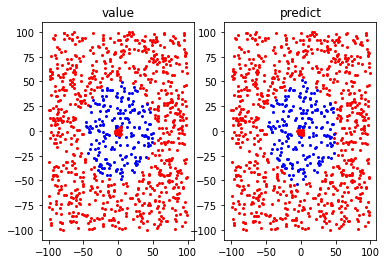

second test
0.977
              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       794
           1       0.96      0.93      0.94       206

    accuracy                           0.98      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



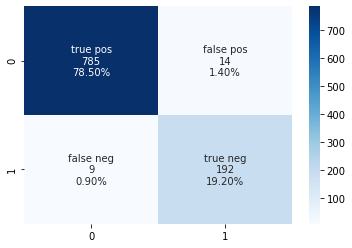

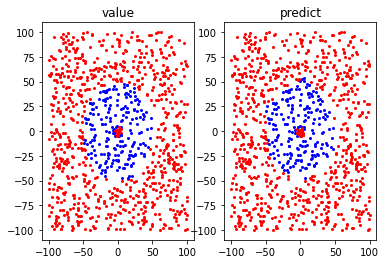

In [30]:
trainb = build_data_partB2(9)
netb2=NeuralNetwork(0.01,trainb,(4,4,4))
netb2.fit()
print("plotting train")
plotting_train2(trainb)


print("first test")
first_testb = build_data_partB2(3)
test_yb=first_testb[["value"]]
pred1=netb2.predict(first_testb)
print(netb2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB2(7)
test_yb=second_testb[["value"]]
pred2=netb2.predict(second_testb)
print(netb2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

hidden layer  1
neuron  1


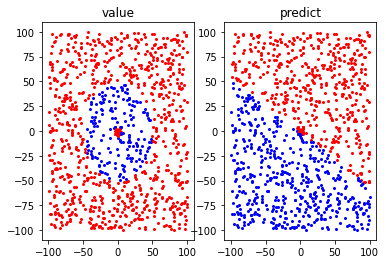

neuron  2


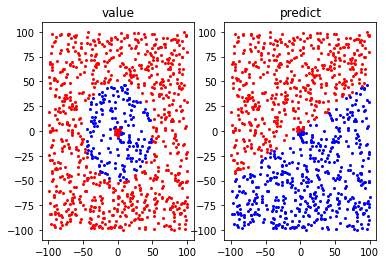

neuron  3


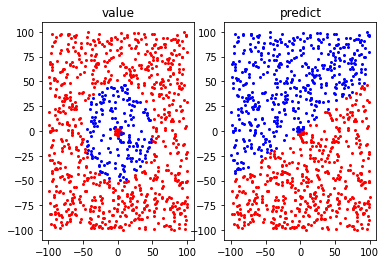

neuron  4


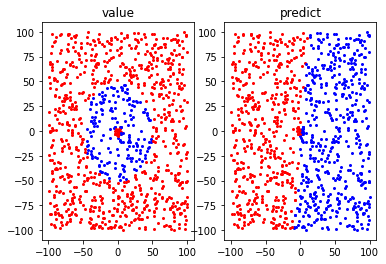

hidden layer  2
neuron  1


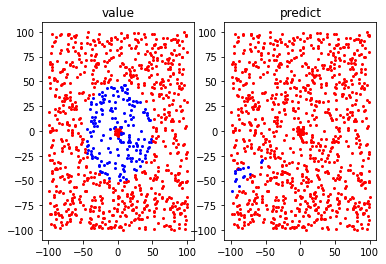

neuron  2


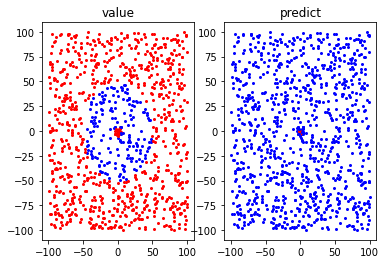

neuron  3


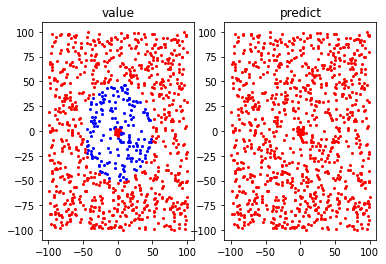

neuron  4


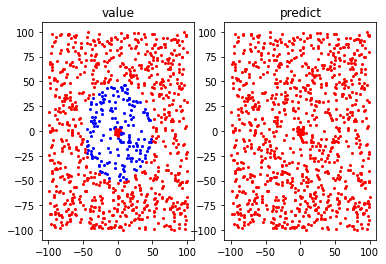

hidden layer  3
neuron  1


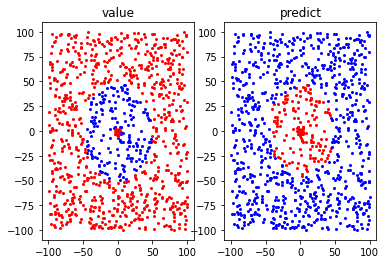

neuron  2


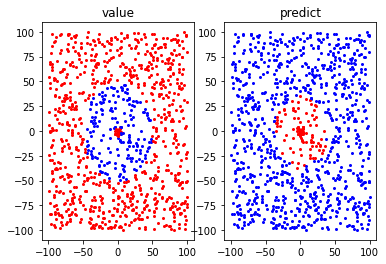

neuron  3


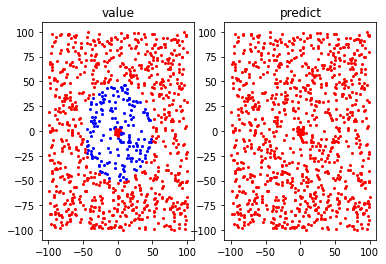

neuron  4


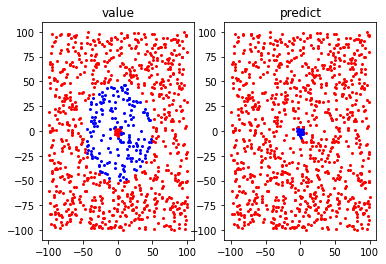

output
neuron  1


In [ ]:
# 5,10,20,10,5 ~96.8
# 5,20,10,5 ~97.7
# 6,18,6 ~96.5
# 6,18,18,6 ~97.5
# 6,18,12,18,6 ~97.8    6,18,12,18,6,3 ~98.4  
# 6,18,9,18,6 ~98.5    6,18,9,18,6,4 ~98 better loook in
# 4,16,8,16,4 ~97.4
netb2.lookin(trainb)

In [ ]:
trainb=build_data_partB2(9)
listA=netb2.getLastHiddenLayerInfo(trainb)
print(listA)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]
print(dftrain.tail(50))
print(dftrain.describe())
print("plotting train")
plotting_train2(trainb)

testb=build_data_partB2(3)
listB=netb2.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",netb2.clf.coefs_[-1])        
ada_b2=Adaline(0.1, dftrain, len(listA)-1,epoch=100,change_lr=-1)
weight,bias =ada_b2.fit()
print("ada weight =\n",weight)
count=ada_b2.predict(dftest,testb,weight, bias)
print(ada_b2.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))